MAP: 0.0990099009900991
MAP: 0.1


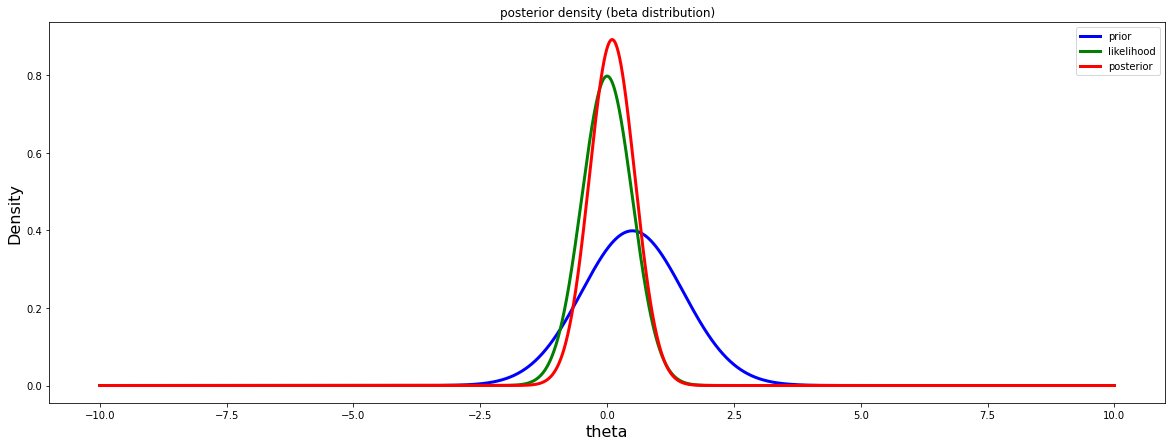

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Gaussian distribution is a conjugate prior of Gaussian distribution

x_range = np.linspace(-10, 10, 10000)

prior_mu = 0.5
prior_sigma = 1
prior = stats.norm.pdf(x_range, prior_mu, prior_sigma)

obs_mu = 0
# FUN experiment: change sigma values
obs_sigma = 0.5
likelihood = stats.norm.pdf(x_range, obs_mu, obs_sigma)
posterior = likelihood * prior
print(f'MAP: {x_range[np.argmax(posterior)]}')

var_1 = prior_sigma**2 
var_2 = obs_sigma**2 

mu = (var_1 * obs_mu  + var_2 * prior_mu) / (var_1 + var_2)

sigma = math.sqrt(1 / (1 / var_1 + 1 / var_2))
posterior = stats.norm.pdf(x_range, mu, sigma)
print(f'MAP: {mu}')

# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(x_range, prior, linewidth=3, color='b', label='prior')
plt.plot(x_range, likelihood, linewidth=3, color='g', label='likelihood')
plt.plot(x_range, posterior, linewidth=3, color='r', label='posterior')
plt.title('posterior density (beta distribution)')
plt.xlabel('theta', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend()
plt.show()

MAP from numerical optimization: 0.2222222222222222, time cost:2.743244171142578
MAP from using beta distribution as conjugate prior: 0.2222222222222222, time cost:2.8700828552246094


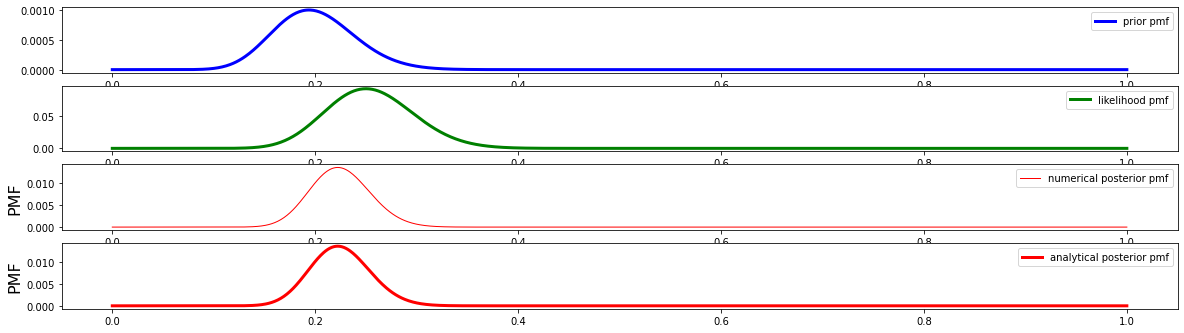

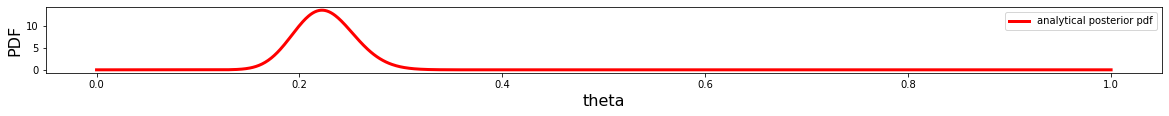

In [123]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

# beta distribution is a conjugate prior of binomial distribution
# FUN experiment: change size value
success_prob = 0.3
data = np.random.binomial(n=1, p=success_prob, size=100)

theta_range = np.linspace(0, 1, 1000)
# FUN experiment: change a,b value
a = 20
b = 80

tic = time.time()
# PDF
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
theta_range_e = theta_range + 0.0001
# PMF
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(data), n = len(data), p = theta_range)
posterior = likelihood * prior
posterior_a = posterior / np.sum(posterior)
toc = time.time()
ms_naive = 1000.0 * (toc - tic)
print(f'MAP from numerical optimization: {theta_range[np.argmax(posterior_a)]}, time cost:{ms_naive}')

# Use conjugate-prior
tic = time.time()
a = a+np.sum(data)
b = b+len(data)-np.sum(data)
# PMF
posterior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b)
posterior_b = posterior / np.sum(posterior)
# PDF
posterior = stats.beta.pdf(x = theta_range, a=a, b=b)
mode = (a-1) / (a+b-2)
toc = time.time()
ms_naive = 1000.0 * (toc - tic)
print(f'MAP from using beta distribution as conjugate prior: {mode}, time cost:{ms_naive}')

# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
plt.subplot(511)
plt.plot(theta_range, prior, linewidth=3, color='b', label='prior pmf')
plt.legend()
plt.subplot(512)
plt.plot(theta_range, likelihood, linewidth=3, color='g', label='likelihood pmf')
plt.legend()
plt.subplot(513)
plt.plot(theta_range, posterior_a, linewidth=1, color='r', label='numerical posterior pmf')
plt.ylabel('PMF', fontsize=16)
plt.legend()
plt.subplot(514)
plt.plot(theta_range, posterior_b, linewidth=3, color='r', label='analytical posterior pmf')
plt.ylabel('PMF', fontsize=16)
plt.legend()
plt.show()
plt.subplot(515)
plt.plot(theta_range, posterior, linewidth=3, color='r', label='analytical posterior pdf')
plt.xlabel('theta', fontsize=16)
plt.ylabel('PDF', fontsize=16)
plt.legend()
plt.show()

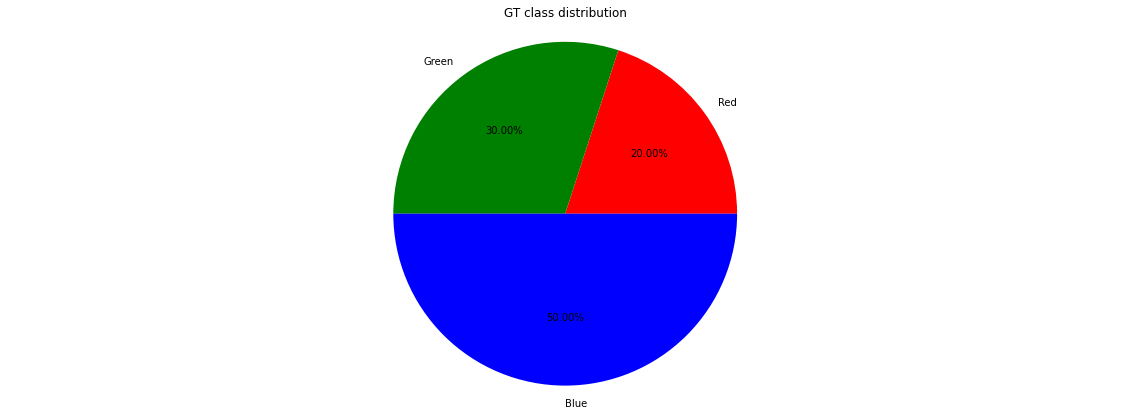

GT: r:0.2, g:0.3, b:0.5
Estimation: r:0.2019586289597282, g:0.2977915459178575, b:0.5002498251224143


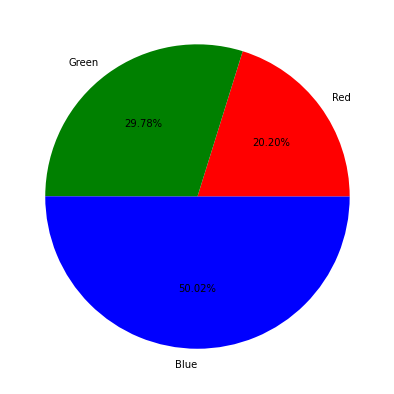

In [133]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Red', 'Green', 'Blue'
probs = [0.2, 0.3, 0.5]
colors = ['r', 'g', 'b']

plt.subplot()
plt.pie(probs, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('GT class distribution')
plt.axis('equal')  
plt.show()
print(f'GT: r:{probs[0]}, g:{probs[1]}, b:{probs[2]}')
data = []
r_cnt = 0
g_cnt = 0
b_cnt = 0
for e in np.random.uniform(0, 1, 10000):
    if e <= probs[0]:
        obs = 'r'
    elif e <= probs[0] + probs[1]:
        obs = 'g'
    else:
        obs = 'b'
    data.append(obs)


alpha_r = 2
alpha_g = 4
alpha_b = 4
alpha = (alpha_r, alpha_g, alpha_b)
#print(np.random.dirichlet((20000, 30000, 50000)))
#print(np.random.dirichlet(alpha))


for elem in data:
    if elem == 'r':
        alpha_r += 1
    elif elem == 'g':
        alpha_g += 1
    elif elem == 'b':
        alpha_b += 1
    alpha_sum = alpha_r + alpha_g + alpha_b
    modes = [(alpha_r - 1) / (alpha_sum - 3), (alpha_g - 1) / (alpha_sum - 3), (alpha_b - 1) / (alpha_sum - 3)]

plt.subplots()
plt.pie(modes, labels=labels, colors=colors, autopct='%1.2f%%')
# print(alpha_r, alpha_g, alpha_b)

print(f'Estimation: r:{modes[0]}, g:{modes[1]}, b:{modes[2]}')

In [134]:
 %matplotlib inline

(70, 100, 3)


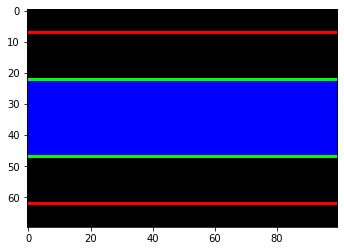

In [179]:
# Grid based semantic mapping, suppose we have a grid map 20mx14m(WxH, res:0.2m)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

res = 0.2
W_m = 20
H_m = 14
W = int(W_m / res)
H = int(H_m / res)
gt_im = np.zeros((H, W, 3))
# --> x, W
# |
# |
# y
# H
#gt_im[1, 3, 0] = 1. # red
#gt_im[3, 1, 1] = 1. # green
#gt_im[3, 3, 2] = 1. # blue

# boundaries at y = 1.5, 12.5
# lane lines at y = 4.5, 9.5 
b_l_y = 1.5
b_r_y = 12.5
line_l_y = 4.5
line_r_y = 9.5
print(gt_im.shape)
gt_im[int(b_l_y/res), :, 0] = 1 # red bounadry
gt_im[int(b_r_y/res), :, 0] = 1
gt_im[int(line_l_y/res), :, 1] = 1 # green line
gt_im[int(line_r_y/res), :, 1] = 1
gt_im[int(line_l_y/res)+1 : int(line_r_y/res), :, 2] = 1 # blue lane

plt.imshow(gt_im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aggregated observations


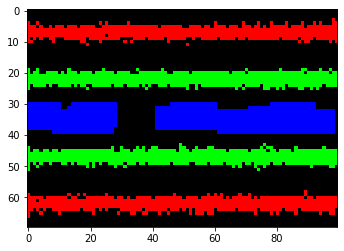

In [472]:

max_runs = 20
r = 0
g = 1
b = 2
car_L_h = 1.5
car_W_h = 0.75
def clip_x(xs):
    #if isinstance(xs, list) or isinstance(xs, (np.ndarray, np.generic)):
    #    return np.clip([int(x) for x in xs], 0, W-1)
    return np.clip(int(xs), 0, W-1)
def clip_y(ys):
    #if isinstance(ys, list) or isinstance(ys, (np.ndarray, np.generic)):
    #    return np.clip([int(y) for y in ys], 0, H-1)
    return np.clip(int(ys), 0, H-1)

obs_im = np.zeros((H, W, 3))
b_x_n = 0.1
b_y_n = 0.2
l_x_n = 0.1
k_y_n = 0.2
sample_dist = 0.1
obs_blind_range = 0

for i in range(max_runs):
    # print(f'iter: {i}')
    car_x = np.random.uniform(-10, W_m)
    car_y = np.random.uniform(H_m/2-0.25, H_m/2+0.25)
    # print(f'car at: ({car_x, car_y})')
    # TODO: orientation
    start_x = clip_x((car_x-car_L_h)/res)
    end_x = clip_x((car_x+car_L_h)/res)
    x_indices = range(start_x, end_x)
    start_y = clip_y((car_y-car_W_h)/res)
    end_y = clip_y((car_y+car_W_h)/res+1)
    y_indices = range(start_y, end_y)
    if start_x != end_x and start_y != end_y:
        yv, xv = np.meshgrid(y_indices, x_indices, indexing='ij')
        obs_im[yv, xv, b] += 1
    # Get boundary and lane line detections
    # step 1: sample points
    sampled_points = np.arange(car_x + car_L_h + obs_blind_range, W_m, sample_dist)
    for p in sampled_points:
        # line
        p_x = p+np.random.normal(0, l_x_n)
        p_y = line_l_y+np.random.normal(0, b_y_n)     
        obs_im[clip_y(p_y/res), clip_x(p_x/res), g] += 1
        
        p_x = p+np.random.normal(0, l_x_n)
        p_y = line_r_y+np.random.normal(0, b_y_n)     
        obs_im[clip_y(p_y/res), clip_x(p_x/res), g] += 1
        
        # boundary
        p_x = p+np.random.normal(0, b_x_n)
        p_y = b_l_y+np.random.normal(0, b_y_n)     
        obs_im[clip_y(p_y/res), clip_x(p_x/res), r] += 1
        
        p_x = p+np.random.normal(0, b_x_n)
        p_y = b_r_y+np.random.normal(0, b_y_n)     
        obs_im[clip_y(p_y/res), clip_x(p_x/res), r] += 1

#obs_im /= max_runs
print('Aggregated observations')
plt.imshow(obs_im)

Segmentation map


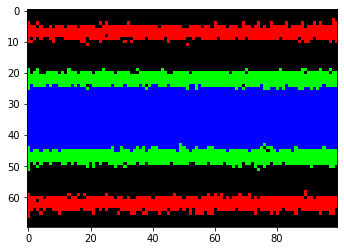

In [492]:
grid_alpha_c = np.full((H, W, 4), (1.0, 1.0, 1.0, 1.0)) # if prior is less than 1, there will be a problem. 
for y in range(H):
    for x in range(W):   
        obs = obs_im[y, x, :]
        grid_alpha_c[y, x, 0] += obs[0]
        grid_alpha_c[y, x, 1] += obs[1] 
        grid_alpha_c[y, x, 2] += obs[2]
        grid_alpha_c[y, x, 3] += max_runs - np.sum(obs)
        
pred_im = np.zeros((H, W, 3))
for y in range(H):
    for x in range(W):
        r = grid_alpha_c[y, x, 0]
        g = grid_alpha_c[y, x, 1]
        b = grid_alpha_c[y, x, 2]
        u = grid_alpha_c[y, x, 3]
        #total = r + g + b + u
        #pred_im[y, x, 0] = (r-1) / (total-4)
        #pred_im[y, x, 1] = (g-1) / (total-4)
        #pred_im[y, x, 2] = (b-1) / (total-4)
        total = r + g + b
        if (total <= 3):
            continue;
        pred_im[y, x, 0] = (r-1) / (total-3)
        pred_im[y, x, 1] = (g-1) / (total-3)
        pred_im[y, x, 2] = (b-1) / (total-3)

pred_im_no_kernel = pred_im

def hacky_region_growing(pred_im):
    for col in range(W):
        last_pixel_l_line = -1
        first_pixel_r_line = -1
        for row in range(H):
            if row < H / 2 and pred_im[row, col, 1] > 0:
                last_pixel_l_line = row
            if row > H / 2 and pred_im[row, col, 1] > 0:
                first_pixel_r_line = row
                break
        if last_pixel_l_line != -1 and first_pixel_r_line != -1:
            pred_im[last_pixel_l_line+1:first_pixel_r_line, col, 2] = 1
    return pred_im

pred_im_no_kernel = hacky_region_growing(pred_im)
plt.imshow(pred_im_no_kernel)
print('Segmentation map')

Ground truth


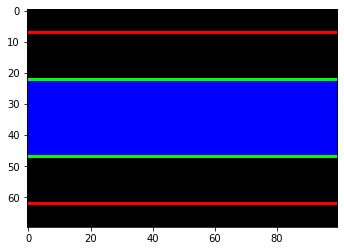

In [397]:
plt.imshow(gt_im)
print('Ground truth')

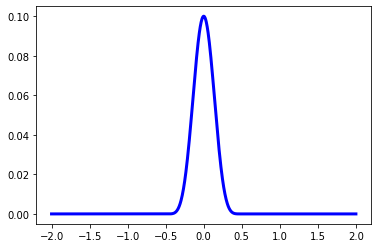

In [443]:
# Use kernels
import math
def kernel_xy(x, y, l):
    d = math.sqrt((x[0]-y[0]) ** 2 +  (x[1]-y[1]) ** 2)
    return kernel(d, l)

def kernel(d, l):
    s = 0.1    
    ret = s * ((2+np.cos(2*math.pi*d/l))/3.0 * (1-d/l)  +  np.sin(2*math.pi*d/l)/(2*math.pi))
    ret[d >= l] = 0
    return ret

x_range = np.linspace(-2, 2, 1000)
y = kernel(np.abs(x_range), 0.5)
plt.subplots()
plt.plot(x_range, y, linewidth=3, color='b')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Segmentation map without region growing


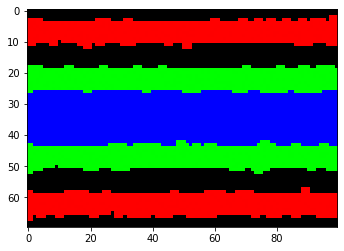

In [493]:
grid_alpha_c = np.full((H, W, 4), (1.0, 1.0, 1.0, 1.0))
l = 0.3
l_in_pixel = int(l / res)
for y in range(H):
    for x in range(W):
        for j in range(-l_in_pixel, l_in_pixel+1):
            for i in range(-l_in_pixel, l_in_pixel+1):
                yj = y + j
                xi = x + i
                if 0 <= yj and yj < H and 0 <= xi and xi < W:
                    obs = obs_im[yj, xi, :]
                    kernel_dist = kernel(np.array([math.sqrt((i*res)**2 + (j*res)**2)]), l)
                    grid_alpha_c[y, x, 0] += kernel_dist * obs[0]
                    grid_alpha_c[y, x, 1] += kernel_dist * obs[1]
                    grid_alpha_c[y, x, 2] += kernel_dist * obs[2]
                    grid_alpha_c[y, x, 3] += kernel_dist * (max_runs - np.sum(obs))
        
pred_im = np.zeros((H, W, 3))
for y in range(H):
    for x in range(W):
        r = grid_alpha_c[y, x, 0]
        g = grid_alpha_c[y, x, 1]
        b = grid_alpha_c[y, x, 2]
        u = grid_alpha_c[y, x, 3]
        #total = r + g + b + u
        #pred_im[y, x, 0] = (r-1) / (total-4)
        #pred_im[y, x, 1] = (g-1) / (total-4)
        #pred_im[y, x, 2] = (b-1) / (total-4)
        total = r + g + b
        if (total <= 3):
            continue;
        pred_im[y, x, 0] = (r-1) / (total-3)
        pred_im[y, x, 1] = (g-1) / (total-3)
        pred_im[y, x, 2] = (b-1) / (total-3)
plt.imshow(hacky_region_growing(pred_im))
print('Segmentation map without region growing')

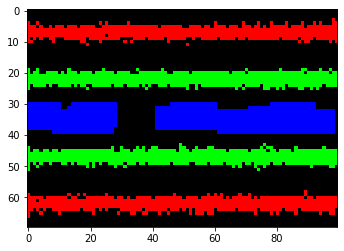

In [475]:
plt.imshow(pred_im_no_kernel)

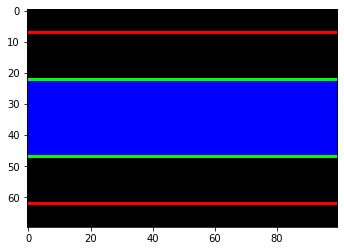

In [476]:
plt.imshow(gt_im)